<a href="https://colab.research.google.com/github/LiamMerrill/Logistic_Regression/blob/main/Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

##Load and Inspect Data

Data is collected from uci.edu's [website](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#). 

Data Set Information:

"Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images."

These are the features included in the dataset: 

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

--2022-11-13 23:39:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46400 (45K) [application/x-httpd-php]
Saving to: ‘data_banknote_authentication.txt’

data_banknote_authe 100%[===================>]  45.31K  --.-KB/s    in 0.02s   

2022-11-13 23:39:15 (2.25 MB/s) - ‘data_banknote_authentication.txt’ saved [46400/46400]



In [ ]:
import pandas as pd
data = pd.read_csv('data_banknote_authentication.txt', sep = ',', header=None, 
                   names=["Variance", "Skewness", "Curtosis", "Entropy", "Class"])
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Classes aren't currently shuffled.

In [ ]:
#How many entries do we have?
print(data.shape[0])

1372


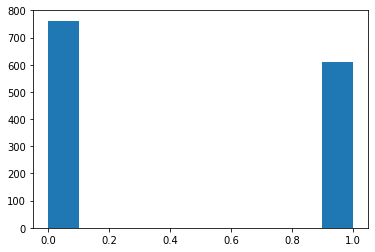

In [ ]:
#What are class labels? Are they balanced?
import matplotlib.pyplot as plt
plt.hist(data['Class'])
plt.show()

Data is slightly skewed but not significantly.

##Data Preparation

We need to split the dataset into training and testing data. Split the dataset into training (80%) and testing data (20%).


First I will shuffle the data because it looks like Class is not suffled.

In [ ]:
data = data.sample(frac = 1)

Splitting the data into 80 percent training and 20 percent testing. I'm doing this using the loc method, grabbing four features in the X variable and Class in the y variable.

In [ ]:
#put your code here
from sklearn.model_selection import train_test_split
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
data = data.loc[:, columns]
features = ["Variance", "Skewness", "Curtosis", "Entropy"]
X = data.loc[:, features]
X['Bias'] = 1
y = data.loc[:, ['Class']]
#train and test are training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = .8)

In [ ]:
y.head(10)

,Class
184,0
1129,1
576,0
572,0
381,0
1355,1
196,0
1335,1
1206,1
1269,1


Now the data has been shuffled. Checking the size of the train and test size.

In [ ]:
print('Train Size: ', X_train.shape[0])
print('Test Size: ', X_test.shape[0])

Train Size:  1097
Test Size:  275


##Logistic regression

Logistic regression outputs values from zero to one, which we think of as probabilities. Logistic regression is a sigmoid function acting on a linear regression.

In [ ]:
import numpy as np
import pandas as pd

When z is negative, sigmoid is close to zero. When z is positive number, sigmoid is close to 1. 

In [ ]:
def sigmoid(z):
  return np.exp(z)/(1 + np.exp(z))

In [ ]:
print(sigmoid(-5))
print(sigmoid(5))

0.006692850924284856
0.9933071490757152


Now I'm going to impute X into m and n, which makes m the number of rows and n the number of columns.  

In [ ]:
m, n = X.shape

In [ ]:
n

5

Now I will create a new column and populate it with ones, this will serve as the weights.

In [ ]:
w = np.ones((n,1))

The logistic regression function takes two arguments, the weights and the data. y_hat, which is our hypothesis, is equal to the dot product of the weights and the data, run through the sigmoid function. The log_res function returns the hypothesis. 

In [ ]:
def log_res(w, X):
  y_hat = sigmoid(np.dot(w.T, X.T))
  return y_hat

In [ ]:
log_res(w, X_train)

array([[0.9966072 , 0.03871886, 0.99903075, ..., 0.2199479 , 0.37749367,
        0.4182669 ]])

Now we introduce the maximum likelihood loss function. This takes three arguments, the data, the target and the weights. We first impute the target to m, n. Then define y_n so that y is either -1 or 1. Then we define linear_term to equal the dot product of the weights and the data. Then we define exponent_arg to be equal to -y_n times linear term. Then we take the log of 1 + e to the exponent_arg. Finally, loss is equal to all of that over n. We return loss.

In [ ]:
def ml_loss(X, y, w):
  """Maximum likelihood loss"""
  n, m = y.shape
  y_n = np.where(y == 0, -1, 1)
  linear_term = np.dot(w.T, X.T)
  exponent_arg = np.multiply(-y_n.T, linear_term)
  summand = np.log(1 + np.exp(exponent_arg))
  loss = np.sum(summand)/n
  return loss

In [ ]:
ml_loss(X_train, y_train, w)

4.681234767095043

#### Gradient descent

Gradient descent finds the lowest loss function in a convex curve. It takes data, the target, and the weights as the argument.

In [ ]:
def grad_ml_loss(X, y, w):
  n, m = y.shape
  y_n = np.where(y == 0, -1, 1)
  linear_term = np.dot(w.T, X.T)
  sig_arg = sigmoid(np.multiply(-y_n.T, linear_term))
  left = np.multiply(-1*y_n.T, X.T)
  summand = left*sig_arg 
  grad = 1./n*np.sum(summand, axis=1)
  return grad.T

In [ ]:
grad_ml_loss(X_train, y_train, w)

array([ 1.84377087,  2.50125529, -0.10328361, -0.04602236,  0.25234536])

In [ ]:
def gradient_descent(X_train, y_train, lr=0.1, num_epochs=5000):
    w = np.random.normal(0, 1.0, size=(5, 1)) #randomly initialized weight vector
    for epoch in range(num_epochs):
      grad_loss = grad_ml_loss(X_train, y_train, w)
      w = w - lr * np.expand_dims(grad_loss, axis=1) 
      if epoch % 100 == 0:
        loss = ml_loss(X_train, y_train, w)
        print(f"Working on epoch: {epoch}\t Loss: {loss:.4} \t Weights: {w.T.squeeze()}", end="\r")
    return w

In [ ]:
gradient_descent(X_train, y_train, lr=0.1, num_epochs=5000)

array([[-3.35300599],
       [-1.90894792],
       [-2.30214132],
       [-0.16998033],
       [ 3.43811793]])

#### logistic regression (with L2 regression)

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here we add this as mu.


In [ ]:
def gradient_descent_with_l2(X_train, y_train, lr=0.00000001, mu=0.05, num_epochs=500):
    w = np.random.normal(0, 1.0, size=(5, 1))
    for epoch in range(num_epochs):
      grad_loss = grad_ml_loss(X_train, y_train, w)
      w = w - lr * (np.expand_dims(grad_loss, axis=1) + mu*w)
      loss = ml_loss(X_train, y_train, w)
      if epoch % 100 == 0:
        loss = ml_loss(X_train, y_train, w)
        print(f"Epoch: {epoch}\t Loss: {loss:.4} \t Weights: {w.T.squeeze()}", end="\r")
    return w

#### Cross entropy error measurement

An alternative approach would be the cross entropy loss function, below. 

In [ ]:
def ce_loss(y, y_hat):
    """Cross Entropy Loss"""
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
w_best = gradient_descent(X_train, y_train, lr=0.1, num_epochs=5000)
y_hat = log_res(w_best, X_train)

In [ ]:
ce_loss(y_train, y_hat)

1.7363944444427646

## 10-fold cross validation

#### Training


In [ ]:
losses_test = []
losses_train = []
for i in range(10):
  m, n = X.shape
  delta = m // 10
  X_train = np.concatenate([X[:i*delta].values, X[(i+1)*delta:].values])
  X_test = X[i*delta:(i+1)*delta].values
  y_train = np.concatenate([y[:i*delta].values, y[(i+1)*delta:].values])
  y_test = y[i*delta:(i+1)*delta].values
  loss_train = ml_loss(X_train, y_train, w)
  loss_test = ml_loss(X_test, y_test, w)
  losses_test.append(loss_test)
  losses_train.append(loss_train)

In [ ]:
losses_train

[4.6973946966097415,
 4.656717130502254,
 4.70565169677873,
 4.701301798808141,
 4.706053948887814,
 4.7155802842896755,
 4.7051313103238765,
 4.7420747208100575,
 4.722778216280751,
 4.681234767095043]

#### Testing


In [ ]:
losses_test

[4.758050507016783,
 5.124742435066031,
 4.683616965347429,
 4.722829549242876,
 4.679990824072101,
 4.594114734865547,
 4.688308040323661,
 4.355278026086913,
 4.529228267646735,
 4.903725784028836]

### Plot and Explain

Plot the $E_{in}$ and $E_{val}$. Then explain your findings

(array([1., 0., 1., 0., 1., 4., 1., 1., 0., 1.]),
 array([4.65671713, 4.66525289, 4.67378865, 4.68232441, 4.69086017,
        4.69939593, 4.70793168, 4.71646744, 4.7250032 , 4.73353896,
        4.74207472]),
 <a list of 10 Patch objects>)

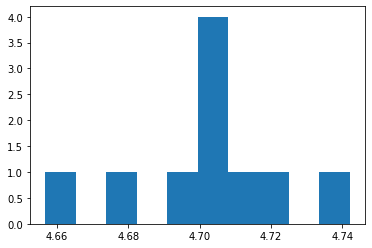

In [ ]:
plt.hist(losses_train)

(array([1., 0., 1., 1., 4., 1., 0., 1., 0., 1.]),
 array([4.35527803, 4.43222447, 4.50917091, 4.58611735, 4.66306379,
        4.74001023, 4.81695667, 4.89390311, 4.97084955, 5.04779599,
        5.12474244]),
 <a list of 10 Patch objects>)

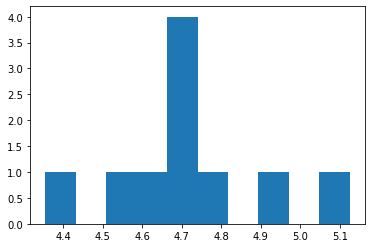

In [ ]:
plt.hist(losses_test)

What is your analysis? Put them here

Losses for train and test converge around 4.7. In the test set one cycle returned an error over 5, which was not the case in the training data, but as the rest were all close in range this doesn't seem to be an issue. 

## Conclusion

This data set studies bank forgeries, by recording several variables describing the characteristics of bank notes, including Variance, Skewness, Curtosis, and Entropy, and then assigning each bank note a class of 1 or 0, representing a forgery or not a forgery. The goal is to create a logistic regression that will be able to predict whether a future bank note is a forgery or not, by collecting these features and measuring how they compare to the patterns in the dataset. To do this, we create test and training sets of th data. The test set represents 20 percent of th data and th training se trepresents 80 percent of the data. We also separate the data into features and target. 

Using the sigmoid function, we are able to squish imputs to a number between 1 and 0 on a log scale, using e. This will allow us to make categorical determinations, classifying data as a 1 or 0. 

The logistic regression produces a hypothesis, by taking the dot product of a set of weights and the data as inputs to the sigmoid function. Improving on this we introduce the maximum likelihood function and gradient descent. These help us to identify the lowest loss function. Adding a coefficient mu as the L2, or ridge regression, stabilizes the results. An alternative approach using cross entropy measurement is provided. 

In order to ensure that the particular sampe of the data that we are using for training and testing is not skewing the results, we train and test using 10 fold cross validation. This cycles through the data, selecting a different 1/10th of th data for its test set and appending the rest for its training set each time. We output ten counts of loss for each cycle of cross validation. 

Plotting these in a histogram, we see that most errors are around 4.7 for both training and testing, showing that there is not a meaningful difference between how th model is operating on training data and test data.